# Song Of The Day Release Date Analysis
---
## Aims 
* This notebook aims to analyse the release dates of each song that features as my song of the day that started in @Sasslyn's Discord. 
* The end product is to hopefully see the distribution across the years.
---
The first job is to verify the excel file can be read and formatted without any issues.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

df = pd.read_excel(r"C:\Users\gcarr\Documents\Excel Books\Song of The Day (WB).xlsm", 
                    sheet_name ='Song of The Day', 
                    index_col = None, 
                    nrows = 255, 
                    usecols = 'A:F'
                    )

remove = ['Number', 'Date', 'Song', 'Artist', 'Platform']
df.drop(remove, inplace= True, axis= 1)

print(df)

            Release Date
0    2019-04-26 00:00:00
1    2016-12-26 00:00:00
2    2021-01-22 00:00:00
3    1996-02-13 00:00:00
4    1966-06-23 00:00:00
..                   ...
250  2022-07-29 00:00:00
251  2022-08-25 00:00:00
252  2022-08-12 00:00:00
253  1981-01-01 00:00:00
254  1979-01-01 00:00:00

[255 rows x 1 columns]


* Now, we have the release date of the songs only.
* Remove any data that is notin an appropriate format :
    * i.e. year only
    * This is to simplify the process

In [2]:
df.isnull().sum()

Release Date    15
dtype: int64

In [3]:
df = df.dropna()
print(df.to_string())

            Release Date
0    2019-04-26 00:00:00
1    2016-12-26 00:00:00
2    2021-01-22 00:00:00
3    1996-02-13 00:00:00
4    1966-06-23 00:00:00
6    2020-08-21 00:00:00
7    2007-04-17 00:00:00
8    1990-10-23 00:00:00
10   2018-12-21 00:00:00
11   2019-07-05 00:00:00
13   1971-11-12 00:00:00
14   1988-08-25 00:00:00
15   2016-12-19 00:00:00
16   2017-07-09 00:00:00
17   2021-12-03 00:00:00
18   2021-02-12 00:00:00
19   2017-05-19 00:00:00
20   2017-04-01 00:00:00
21   1978-03-02 00:00:00
22   1971-09-01 00:00:00
23   2017-06-19 00:00:00
24   1992-08-11 00:00:00
25   2007-01-22 00:00:00
26   2018-10-26 00:00:00
27   2017-03-03 00:00:00
29   2021-08-20 00:00:00
30   2022-03-11 00:00:00
31   2021-09-01 00:00:00
32   2020-12-10 00:00:00
33   2004-06-08 00:00:00
34   2021-06-18 00:00:00
35   2011-02-21 00:00:00
36   2021-06-24 00:00:00
37   2021-02-04 00:00:00
38   2022-01-21 00:00:00
39   2022-01-21 00:00:00
40   2018-06-01 00:00:00
41   2020-05-08 00:00:00
42   2022-01-21 00:00:00


In [4]:
df.isnull().sum()

Release Date    0
dtype: int64

In [5]:
df.drop([55,56,66,67,69,83,90,93,97,124,145,152,153,155,157,161,169,180,191,197,201,211,216,230,235,239], inplace = True)

In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
print(df.to_string())

    Release Date
0     2019-04-26
1     2016-12-26
2     2021-01-22
3     1996-02-13
4     1966-06-23
6     2020-08-21
7     2007-04-17
8     1990-10-23
10    2018-12-21
11    2019-07-05
13    1971-11-12
14    1988-08-25
15    2016-12-19
16    2017-07-09
17    2021-12-03
18    2021-02-12
19    2017-05-19
20    2017-04-01
21    1978-03-02
22    1971-09-01
23    2017-06-19
24    1992-08-11
25    2007-01-22
26    2018-10-26
27    2017-03-03
29    2021-08-20
30    2022-03-11
31    2021-09-01
32    2020-12-10
33    2004-06-08
34    2021-06-18
35    2011-02-21
36    2021-06-24
37    2021-02-04
38    2022-01-21
39    2022-01-21
40    2018-06-01
41    2020-05-08
42    2022-01-21
43    1973-07-01
44    2021-07-09
45    2020-09-25
46    2020-02-21
47    2019-02-21
48    2022-01-14
49    2021-07-15
50    2021-09-07
51    2007-06-05
52    2015-04-27
53    2020-05-01
54    2020-02-19
57    1993-09-10
58    2004-10-11
59    2021-11-26
60    2018-10-05
61    1970-09-18
62    2022-02-11
63    2019-07-

---
## Data Party
---
* This Data should now be in a state that means it can be manipulated with any of the following:
    * pandas 
    * matplotlib 
    * seaborn 
    * etc...
---

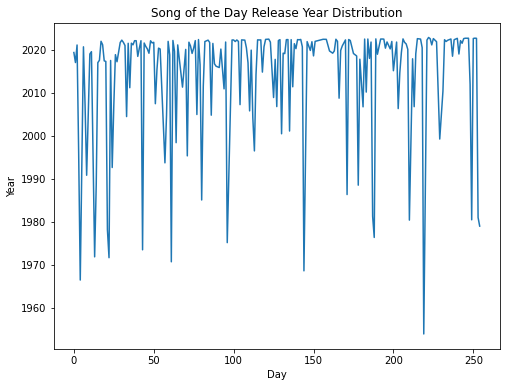

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

f, ax = plt.subplots(figsize=(8, 6))

plt.xlabel('Day')
plt.ylabel('Year')
plt.title('Song of the Day Release Year Distribution')

plt.plot(df)

---
* The above graph is informative but overall quite useless!
* A bar graph may be more appropriate for this data
---

In [8]:
df['Year'] = df['Release Date'].dt.year
df.sort_values('Year', inplace = True)

data = df['Year'].to_dict()

print('Number of useable entries:',len(data))
print('Dictionary Values:','\n',data.values())

Number of useable entries: 214
Dictionary Values: 
 dict_values([1953, 1966, 1968, 1970, 1971, 1971, 1973, 1975, 1976, 1978, 1979, 1980, 1980, 1981, 1981, 1985, 1986, 1988, 1988, 1990, 1992, 1993, 1995, 1996, 1996, 1998, 1999, 2000, 2001, 2004, 2004, 2004, 2004, 2004, 2005, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2008, 2008, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022,

---
* This is more presentable/workable
* Visit https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/ for more info about counters and access.
---

In [9]:
from collections import Counter

OutDict = Counter(data.values())

print('Class Type:',type(OutDict))
print('\n','Values:','\n',OutDict)

Class Type: <class 'collections.Counter'>

 Values: 
 Counter({2022: 59, 2021: 36, 2020: 20, 2019: 16, 2017: 9, 2018: 9, 2016: 6, 2004: 5, 2011: 5, 2006: 4, 2007: 4, 2010: 3, 2014: 3, 2015: 3, 1971: 2, 1980: 2, 1981: 2, 1988: 2, 1996: 2, 2008: 2, 1953: 1, 1966: 1, 1968: 1, 1970: 1, 1973: 1, 1975: 1, 1976: 1, 1978: 1, 1979: 1, 1985: 1, 1986: 1, 1990: 1, 1992: 1, 1993: 1, 1995: 1, 1998: 1, 1999: 1, 2000: 1, 2001: 1, 2005: 1})


---
* This next section here was an addition after I reliased that the df would work with the collections.counter class. 
---

In [10]:
df = pd.DataFrame(OutDict, index = ['Number of Releases'])
print(df)

                    1953  1966  1968  1970  1971  1973  1975  1976  1978  \
Number of Releases     1     1     1     1     2     1     1     1     1   

                    1979  ...  2011  2014  2015  2016  2017  2018  2019  2020  \
Number of Releases     1  ...     5     3     3     6     9     9    16    20   

                    2021  2022  
Number of Releases    36    59  

[1 rows x 40 columns]


In [11]:
df.transpose()

,Number of Releases
1953,1
1966,1
1968,1
1970,1
1971,2
1973,1
1975,1
1976,1
1978,1
1979,1


<AxesSubplot:title={'center':'Song of the Day Release Years'}>

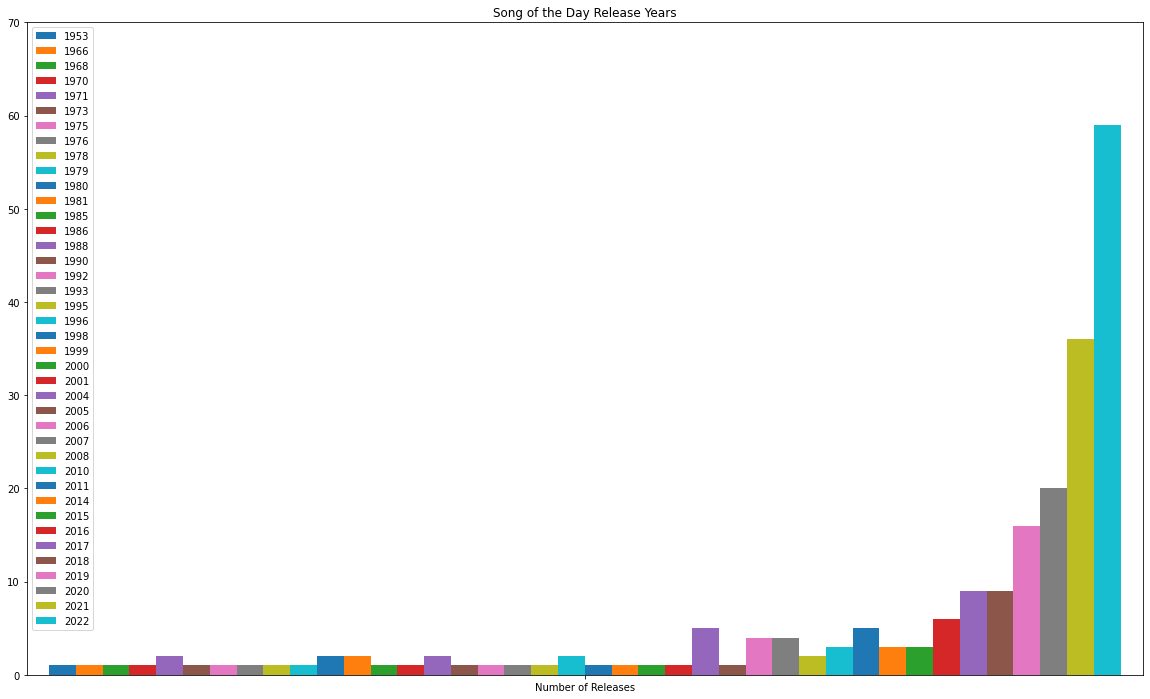

In [12]:
pd.plotting.register_matplotlib_converters()
df.plot.bar(title = 'Song of the Day Release Years',
            width = 12,
            #xlabel = 'Year of Release',
            #ylabel = 'Number of Releases',
            ylim = (0, 70),
            figsize = (20, 12),
            rot = 0,
            #position = 0.0, 
            #table = True   
)

* this concludes what i wanted to do with my song of the day info for now!
---
---